## 3. Geospatial analysis

### 1. Importing libraries

### 2. Importing data

### 3. Data wrangling and cleaning

### 4. Choropleth map

#### 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json

In [3]:
# Getting matplotlib visuals to appear in the notebook
%matplotlib inline

#### 2. Importing data

In [5]:
uk_geo = r'C:\Users\Priya\OneDrive\Documents\CareerFoundry\Data Immersion\Achievement 6\Greenhouse Gas Emissions Analysis\02 Data\Original Data\uk_regions.geojson'

In [7]:
uk_geo

'C:\\Users\\Priya\\OneDrive\\Documents\\CareerFoundry\\Data Immersion\\Achievement 6\\Greenhouse Gas Emissions Analysis\\02 Data\\Original Data\\uk_regions.geojson'

In [9]:
path = r'C:\Users\Priya\OneDrive\Documents\CareerFoundry\Data Immersion\Achievement 6\Greenhouse Gas Emissions Analysis'

In [11]:
path

'C:\\Users\\Priya\\OneDrive\\Documents\\CareerFoundry\\Data Immersion\\Achievement 6\\Greenhouse Gas Emissions Analysis'

In [13]:
# Importing the greenhouse gas emissions dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'emissions-cleaned.csv'), index_col = False)

Contains public sector information licensed under the Open Government Licence v3.0. License: https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/

#### 3. Data wrangling and cleaning

In [15]:
# Checking the shape of the dataframe
df.shape

(533016, 16)

In [17]:
# Viewing the first five rows of the dataframe
df.head()

,Unnamed: 0,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [19]:
# Dropping the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace = True)

In [21]:
# Checking the shape of the dataframe
df.shape

(533016, 15)

In [23]:
# Checking if the Unnamed: 0 column was removed
df.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [25]:
# Checking value counts for the Region column
df['Region'].value_counts()

Region
South East                  93988
East of England             65897
North West                  53434
East Midlands               51598
London                      46863
Scotland                    46538
West Midlands               45014
South West                  39592
Wales                       32631
Yorkshire and the Humber    22865
North East                  17814
Northern Ireland            16368
Unallocated                   414
Name: count, dtype: int64

In [27]:
# Renaming East of England to East to match the geojson file
df['Region'] = df['Region'].replace({'East of England': 'East'})

In [29]:
# Checking if East of England was replaced with East
df['Region'].value_counts()

Region
South East                  93988
East                        65897
North West                  53434
East Midlands               51598
London                      46863
Scotland                    46538
West Midlands               45014
South West                  39592
Wales                       32631
Yorkshire and the Humber    22865
North East                  17814
Northern Ireland            16368
Unallocated                   414
Name: count, dtype: int64

In [31]:
# Creating a subset with the columns to plot on the map
data_to_plot = df[['Region', 'Territorial emissions (kt CO2e)']]

In [33]:
# Checking for missing data
data_to_plot.isnull().sum()

Region                             0
Territorial emissions (kt CO2e)    0
dtype: int64

In [35]:
# Checking for mixed-type data
for col in data_to_plot.columns.tolist():
  weird = (data_to_plot[[col]].applymap(type) != data_to_plot[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (data_to_plot[weird]) > 0:
    print (col)

C:\Users\Priya\AppData\Local\Temp\ipykernel_5776\2432282012.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (data_to_plot[[col]].applymap(type) != data_to_plot[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_5776\2432282012.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (data_to_plot[[col]].applymap(type) != data_to_plot[[col]].iloc[0].apply(type)).any(axis = 1)


In [37]:
# Creating the df_dups subset to check for duplicates
df_dups = df[df.duplicated()]

In [39]:
# Viewing df_dups
df_dups

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)


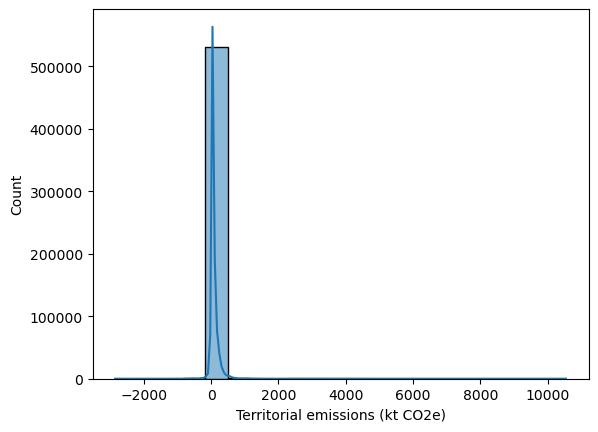

In [41]:
# Checking extreme values for Territorial emissions (kt CO2e)
sns.histplot(data_to_plot['Territorial emissions (kt CO2e)'], bins=20, kde = True)
plt.show()

#### 4. Choropleth map

In [43]:
# Viewing the data_to_plot subset
data_to_plot.head()

,Region,Territorial emissions (kt CO2e)
0,North East,1.678178
1,North East,0.052700
2,North East,0.006770
3,North East,0.311375
4,North East,0.010500


In [55]:
# Grouping by region
data_to_plot = data_to_plot.groupby('Region')['Territorial emissions (kt CO2e)'].sum()

In [61]:
# Viewing the data_to_plot subset
data_to_plot.head(15)

Region
East                        8.260956e+05
East Midlands               7.091413e+05
London                      7.559546e+05
North East                  4.661509e+05
North West                  1.005720e+06
Northern Ireland            3.946021e+05
Scotland                    8.896805e+05
South East                  1.043614e+06
South West                  7.156273e+05
Unallocated                 7.303981e+04
Wales                       6.328074e+05
West Midlands               7.520501e+05
Yorkshire and the Humber    8.614595e+05
Name: Territorial emissions (kt CO2e), dtype: float64

In [63]:
# Creating a folium map
map = folium.Map(location = [55, -3], zoom_start = 5)

folium.Choropleth(
    geo_data = uk_geo, 
    data = data_to_plot,
    columns = ['Region', 'Territorial emissions (kt CO2e)'],
    key_on = 'feature.properties.rgn19nm',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Territorial emissions (kt CO2e)").add_to(map)

folium.LayerControl().add_to(map)

map

The analysis answers two of the existing questions which are the following:
- Which regions have the highest and lowest emissions?: South East, North West, and Scotland regions have the highest emissions. Northern Ireland and North East regions have the lowest emissions.
- How do emission amounts in England compare to those in Northern Ireland, Scotland, and Wales?: Emission amounts in England are much larger than those in Northern Ireland, Scotland, and Wales, given that two of the nine regions in England have greater emissions than Scotland. Due to this, the total emissions from all nine regions of England would result in England having much greater emissions than each of Northern Ireland, Scotland, and Wales. Scotland has the second highest emissions, followed by Wales and then Northern Ireland.

New research questions:
- What causes the differences in territorial emissions between the regions?
- Which greenhouse gas contributes the most to territorial emissions in each region?

In [77]:
# Saving the map as an HTML file
map.save(os.path.join(path, '04 Analysis', 'UK_regions_emissions_map.html'))